# Feature F-Stat Analysis

---
## Load libraries & training data

In [1]:
# change working directory
import os
os.chdir('/home/ubuntu/Projects/numerai-models') # for lambda cloud
# os.chdir('/Users/davidhuang/Documents/GitHub/numerai-models') # for local

In [2]:
# libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from numerapi import NumerAPI
from utils.utils import ERA_COL, TARGET_COL, DATA_TYPE_COL
import gc

In [3]:
# see current round
napi = NumerAPI()
current_round = napi.get_current_round()
print(f"Current round #: {current_round}")

Current round #: 323


In [4]:
# read training and validation data
with open("data/features.json", "r") as f:
    feature_metadata = json.load(f)
features = list(feature_metadata["feature_stats"].keys())
read_columns = features + [TARGET_COL, ERA_COL]

training = pd.read_parquet('data/train.parquet', columns=read_columns).dropna()
validation = pd.read_parquet('data/validation.parquet', columns=read_columns).dropna()

In [5]:
# clean up
gc.collect()

0

---
# Compute era-wise feature f-stats to target

In [6]:
# load lib
from sklearn.feature_selection import f_regression

In [24]:
# function for calculating fstats
def calculate_fstats(df):
    fstats, p_values = f_regression(df[features], df[TARGET_COL])
    return fstats

In [50]:
# get feature fstats per era
training_era_fstats = training.groupby(["era"]).apply(lambda x: calculate_fstats(x))
validation_era_fstats = validation.groupby(["era"]).apply(lambda x: calculate_fstats(x))

In [55]:
# make into fstats matrix (training)
training_era_fstats_list = []

for i in training_era_fstats.index:
    tdf = pd.DataFrame(training_era_fstats[i]).T
    training_era_fstats_list.append(tdf)

training_era_fstats_df = pd.concat(training_era_fstats_list)
training_era_fstats_df.columns = features
training_era_fstats_df.index = training_era_fstats.index

training_era_fstats_df.head()

,feature_honoured_observational_balaamite,feature_polaroid_vadose_quinze,feature_untidy_withdrawn_bargeman,feature_genuine_kyphotic_trehala,feature_unenthralled_sportful_schoolhouse,feature_divulsive_explanatory_ideologue,feature_ichthyotic_roofed_yeshiva,feature_waggly_outlandish_carbonisation,feature_floriated_amish_sprite,feature_iconoclastic_parietal_agonist,...,feature_circumspective_daughterly_brubeck,feature_mimetic_sprawly_flue,feature_inductile_umbrian_wallah,feature_ineloquent_bihari_brougham,feature_shakespearean_alpha_constituent,feature_marxian_plated_refrigeration,feature_amative_irresponsive_flattie,feature_intermissive_coronal_reinsertion,feature_dwarfish_isochronal_amateur,feature_polyphyletic_unplumed_pandiculation
era,,,,,,,,,,,,,,,,,,,,,
0001,1.561491,2.438019e-02,0.108662,1.311928,0.024380,3.642001e-02,0.236000,0.097524,0.878049,0.556674,...,0.637083,1.832823,1.157639,0.236000,1.694435,0.145688,0.412133,0.944324,0.390152,0.188134
0002,2.935137,1.646902e-11,0.358152,0.866816,0.805998,1.646902e-11,0.133736,0.232392,0.099753,0.836138,...,0.610515,0.027629,0.013540,0.718890,0.690966,0.442179,0.511008,0.805998,0.033435,0.805998
0003,1.846002,2.742113e-01,0.026776,0.472412,0.328042,7.738340e-02,0.129600,0.964308,0.781025,0.154235,...,0.002410,0.495178,0.810230,0.006694,0.038557,0.518482,1.981976,3.303645,1.467131,1.063191
0004,0.395457,3.743383e-02,0.066551,0.676339,0.480754,2.339492e-03,0.000260,1.238294,0.967686,0.002340,...,0.050953,0.189522,0.395457,0.002339,0.009358,2.107494,2.107494,2.924429,1.749219,2.250469
0005,0.189122,3.138675e-02,0.189137,0.525446,0.031387,2.594475e-02,0.066417,0.873011,0.934246,0.813790,...,1.271795,5.618797,4.060197,1.499304,2.010579,0.674918,0.573175,1.130532,0.265663,1.235699


In [57]:
# make into fstats matrix (validation)
validation_era_fstats_list = []

for i in validation_era_fstats.index:
    vdf = pd.DataFrame(validation_era_fstats[i]).T
    validation_era_fstats_list.append(vdf)

validation_era_fstats_df = pd.concat(validation_era_fstats_list)
validation_era_fstats_df.columns = features
validation_era_fstats_df.index = validation_era_fstats.index

validation_era_fstats_df.head()

,feature_honoured_observational_balaamite,feature_polaroid_vadose_quinze,feature_untidy_withdrawn_bargeman,feature_genuine_kyphotic_trehala,feature_unenthralled_sportful_schoolhouse,feature_divulsive_explanatory_ideologue,feature_ichthyotic_roofed_yeshiva,feature_waggly_outlandish_carbonisation,feature_floriated_amish_sprite,feature_iconoclastic_parietal_agonist,...,feature_circumspective_daughterly_brubeck,feature_mimetic_sprawly_flue,feature_inductile_umbrian_wallah,feature_ineloquent_bihari_brougham,feature_shakespearean_alpha_constituent,feature_marxian_plated_refrigeration,feature_amative_irresponsive_flattie,feature_intermissive_coronal_reinsertion,feature_dwarfish_isochronal_amateur,feature_polyphyletic_unplumed_pandiculation
era,,,,,,,,,,,,,,,,,,,,,
0575,0.101976,0.187824,0.010532,0.452763,0.168573,0.000520,0.004680,0.874656,0.532764,0.197818,...,0.896169,0.393477,0.299689,1.603027,0.962135,4.527956e-01,0.001170,0.338294,0.015740,0.178068
0576,0.021897,0.008293,0.217781,0.037438,0.018653,0.003238,0.068540,0.015674,1.866272,0.690476,...,0.033163,0.000518,0.377820,0.167915,0.197051,8.553217e-11,0.311068,1.321920,0.350328,0.116595
0577,0.012890,0.309566,0.000129,0.015602,0.012890,0.002062,0.021790,0.309566,0.725261,0.093978,...,0.167093,1.139420,2.637738,1.067836,0.101081,1.010682e-01,0.433709,0.764464,0.668392,0.297037
0578,0.227061,0.002061,0.667357,0.448100,0.185889,0.074137,0.195802,0.046474,0.321808,1.287515,...,0.080445,0.001159,0.510961,0.004632,0.001158,1.159302e-03,0.123712,0.028966,0.015578,0.000514
0579,0.176271,0.080473,0.080471,0.216445,0.015580,0.108283,0.630971,0.348172,0.006309,0.724347,...,2.634301,4.128890,4.506551,1.644604,2.746054,3.296056e-02,0.296664,0.140215,0.000515,0.006309


---
# Get top features by average f-stats

In [106]:
# get top training features
top_training_features = pd.DataFrame(training_era_fstats_df.mean().sort_values(ascending=False))
top_training_features = top_training_features.rename(columns = {0: "training"})
top_training_features

,training
feature_ruthenic_peremptory_truth,7.652608
feature_comprisable_commensurable_cyrenaic,7.524977
feature_lowery_transcribed_muffin,7.426621
feature_pardonable_ungraceful_bedazzlement,7.403910
feature_carbuncled_athanasian_ampul,7.372951
...,...
feature_ironfisted_nonvintage_chlorpromazine,0.117746
feature_suppressed_unremovable_telephone,0.116144
feature_eighteen_kafka_segno,0.114589
feature_cavitied_alleviatory_neuk,0.088365


In [107]:
# get top training features
top_validation_features = pd.DataFrame(validation_era_fstats_df.mean().sort_values(ascending=False))
top_validation_features = top_validation_features.rename(columns = {0: "validation"})
top_validation_features

,validation
feature_ruthenic_peremptory_truth,7.949249
feature_comprisable_commensurable_cyrenaic,7.443672
feature_carbuncled_athanasian_ampul,7.350883
feature_flamier_confusing_dithering,6.720409
feature_incertain_catchable_zibet,6.675487
...,...
feature_suppressed_unremovable_telephone,0.134130
feature_exhibitionist_bicuspidate_goalpost,0.113747
feature_cavitied_alleviatory_neuk,0.112954
feature_eighteen_kafka_segno,0.088157


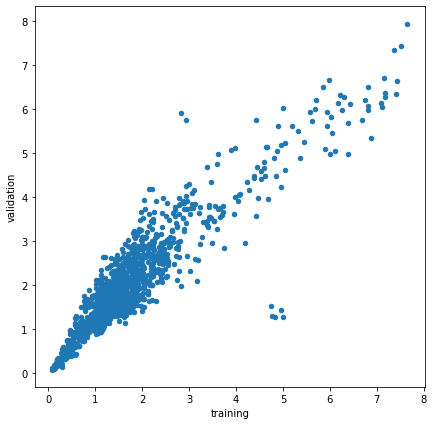

In [108]:
# get scatter
avg_era_fstats = top_training_features.merge(top_validation_features, left_index=True, right_index=True)
avg_era_fstats.plot.scatter(x="training", y="validation", figsize=(7, 7));

In [120]:
# select features
avg_era_fstats["average"] = (avg_era_fstats["training"] + avg_era_fstats["validation"]) / 2
avg_era_fstats["average"].sort_values(ascending=False).head(100)

feature_ruthenic_peremptory_truth             7.800928
feature_comprisable_commensurable_cyrenaic    7.484325
feature_carbuncled_athanasian_ampul           7.361917
feature_lowery_transcribed_muffin             7.035783
feature_flamier_confusing_dithering           6.933515
                                                ...   
feature_imitable_unnatural_samuel             3.502758
feature_milkier_gassy_pincushion              3.495334
feature_corporatist_seborrheic_hopi           3.488289
feature_phyletic_separate_genuflexion         3.484179
feature_disillusive_saltant_placidity         3.481536
Name: average, Length: 100, dtype: float64

In [134]:
# save as features
top_fstats_50 = {"top_fstats_50" : avg_era_fstats["average"].sort_values(ascending=False).head(50).index.tolist()}
top_fstats_100 = {"top_fstats_100" : avg_era_fstats["average"].sort_values(ascending=False).head(100).index.tolist()}
top_fstats_200 = {"top_fstats_200" : avg_era_fstats["average"].sort_values(ascending=False).head(200).index.tolist()}
top_fstats_500 = {"top_fstats_500" : avg_era_fstats["average"].sort_values(ascending=False).head(500).index.tolist()}

In [136]:
# save files
with open("data/top_fstats_50_features.json", "w") as outfile:
    json.dump(top_fstats_50, outfile, indent = 4)

with open("data/top_fstats_100_features.json", "w") as outfile:
    json.dump(top_fstats_100, outfile, indent = 4)
    
with open("data/top_fstats_200_features.json", "w") as outfile:
    json.dump(top_fstats_200, outfile, indent = 4)
    
with open("data/top_fstats_500_features.json", "w") as outfile:
    json.dump(top_fstats_500, outfile, indent = 4)

---
# Test predictiveness of top features